In [31]:
import numpy as np
import pandas as pd

np.random.seed(23) 

# Class 1 data
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Class 2 data
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Use pd.concat to combine the DataFrames
df = pd.concat([df, df1], ignore_index=True)

# Sample 40 rows
df = df.sample(40)

# Check the resulting DataFrame


In [32]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [33]:

import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [34]:
# step 1 Apply standard scaling 

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [35]:
# Step 2 find cov 

covariance_matrix =np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [36]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [37]:
eigen_values


array([1.3536065 , 0.94557084, 0.77774573])

In [38]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

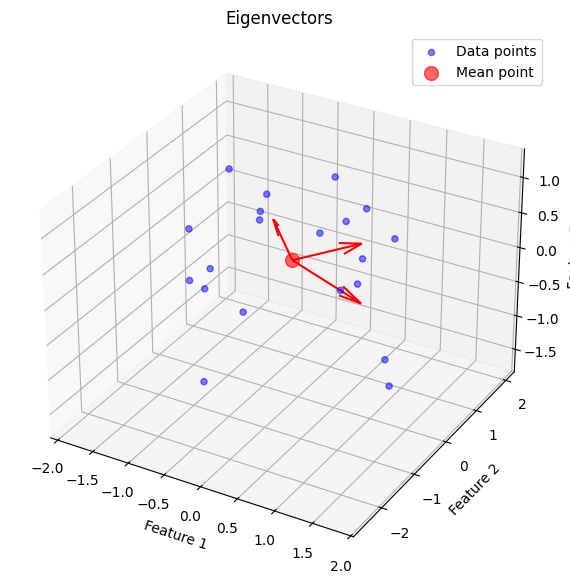

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace with your actual df)
np.random.seed(23)
df = pd.DataFrame({
    'feature1': np.random.randn(20),
    'feature2': np.random.randn(20),
    'feature3': np.random.randn(20),
})
df['target'] = np.random.choice([0, 1], size=20)

# Calculate the mean of the data
mean_point = np.array([df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()])

# Eigenvectors (use actual eigenvectors if you have them)
# For this example, using random vectors as placeholders
eigen_vectors = np.random.randn(3, 3)

# Plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c='blue', alpha=0.5, label="Data points")
ax.scatter(mean_point[0], mean_point[1], mean_point[2], c='red', s=100, alpha=0.6, label="Mean point")

# Plot eigenvectors as arrows using quiver
for v in eigen_vectors.T:
    ax.quiver(mean_point[0], mean_point[1], mean_point[2], v[0], v[1], v[2], color='r', length=1, normalize=True)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Eigenvectors')

# Show legend
ax.legend()

plt.show()


In [40]:

pc = eigen_vectors[0:2]
pc

array([[ 0.67686012,  3.18750269, -1.08056475],
       [ 0.0102293 ,  0.43782968,  1.32778762]])

In [41]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.206413,-0.063727,0
1,2.338247,1.700695,1
2,0.734543,0.786166,1
3,2.785941,0.911817,0
4,1.320531,0.018038,1


In [42]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()